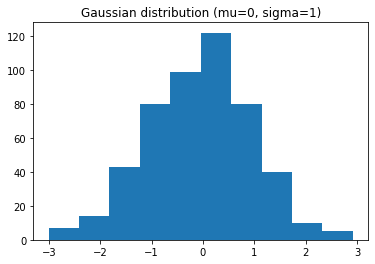

In [2]:
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline

l = [gauss(0, 1) for _ in range(500)]
plt.hist(l)
plt.title('Gaussian distribution (mu=0, sigma=1)')
plt.show()

In [9]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv -O glt.csv

--2022-04-08 22:25:22--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12720645 (12M) [text/plain]
Saving to: ‘glt.csv’

glt.csv             100%[===================>]  12,13M  38,8MB/s    in 0,3s    

2022-04-08 22:25:22 (38,8 MB/s) - ‘glt.csv’ saved [12720645/12720645]



In [17]:
import csv
import numpy as np

with open("glt.csv", "r") as f:
    lol = []
    for cols in csv.reader(f):
        lol.append(cols)
    lol = np.array(lol)
        

In [33]:
avg_temp = np.array(lol)[:, 1]
avg_temp[1:]

array(['26.704', '27.434', '', ..., '12.399', '4.7360000000000015',
       '-0.8220000000000001'], dtype='<U34')

In [3]:
def fill_value(ary: np.array) -> np.array:
    cnt = 0
    val = 0
    flag = None
    for x in ary:
        #print(cnt)
        if x == "":
            if cnt == len(ary)-1:
                ary[cnt] = val/2
            flag = cnt
            print("flag", flag)
        else:
            val = float(x)
            print("val", val/2)
            if ary[flag] == "":
                ary[flag] = val/2
    
        cnt += 1
    return ary

In [4]:
ary = ["","5","6",""]
fill_value(ary)

0
flag 0
1
val 2.5
2
val 3.0
3
flag 3


[2.5, '5', '6', 3.0]

In [ ]:
avg_temp = fill_value(avg_temp[1:])

In [1]:
import pandas as pd
import numpy as np


df = pd.read_csv("glt.csv")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219575 entries, 0 to 219574
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Date                           219575 non-null  object 
 1   AverageTemperature             191994 non-null  float64
 2   AverageTemperatureUncertainty  191994 non-null  float64
 3   City                           219575 non-null  object 
 4   Country                        219575 non-null  object 
 5   Latitude                       219575 non-null  object 
 6   Longitude                      219575 non-null  object 
dtypes: float64(2), object(5)
memory usage: 11.7+ MB


In [9]:
df['City'].unique()

array(['Abidjan', 'Addis Abeba', 'Ahmadabad', 'Aleppo', 'Alexandria',
       'Ankara', 'Baghdad', 'Bangalore', 'Bangkok', 'Belo Horizonte',
       'Berlin', 'Bogotá', 'Bombay', 'Brasília', 'Cairo', 'Calcutta',
       'Cali', 'Cape Town', 'Casablanca', 'Changchun', 'Chengdu',
       'Chicago', 'Chongqing', 'Dakar', 'Dalian', 'Dar Es Salaam',
       'Delhi', 'Dhaka', 'Durban', 'Faisalabad', 'Fortaleza', 'Gizeh',
       'Guangzhou', 'Harare', 'Harbin', 'Ho Chi Minh City', 'Hyderabad',
       'Ibadan', 'Istanbul', 'Izmir', 'Jaipur', 'Jakarta', 'Jiddah',
       'Jinan', 'Kabul', 'Kano', 'Kanpur', 'Karachi', 'Kiev', 'Kinshasa',
       'Lagos', 'Lahore', 'Lakhnau', 'Lima', 'London', 'Los Angeles',
       'Luanda', 'Madras', 'Madrid', 'Manila', 'Mashhad', 'Melbourne',
       'Mexico', 'Mogadishu', 'Montreal', 'Moscow', 'Nagoya', 'Nagpur',
       'Nairobi', 'Nanjing', 'New Delhi', 'New York', 'Paris', 'Peking',
       'Pune', 'Rangoon', 'Rio De Janeiro', 'Riyadh', 'Rome',
       'Saint Petersbu

In [157]:
def str_to_float(l:list) -> list:
    """Return the same list but with float values

    Args:
        l (list): input list of str values

    Returns:
        list: output list filled with None and floats
    """
    return [None if i == '' else float(i) for i in l]

def pick_forward_value(li:list, index:int=0) -> float:
    for i in range(index + 1, len(li)):
        if li[i] == None:
            continue
        else:
            return float(li[i])

def pick_backward_value(li:list, index:int=-1) -> float:        
    for i in range(index - 1 , 0 - 1, -1):
        if li[i] == None:
            continue
        else:
            return float(li[i])
    return None

import copy

def fill_list(original_list:list) -> list:
    # Transform the list if it has strings instead of floats
    original_list = str_to_float(original_list)
    
    # Make a copy that we will fill
    newl = copy.deepcopy(original_list)
    
    # Subsitute values
    for i in range(len(original_list)):
        #### initial value ####
        if (i == 0):  
            if (original_list[i] == None): 
                val1 = pick_forward_value(original_list, i)
                val = val1/2
                newl[i] = val
            else:
                continue
        #### last value ####
        elif (i == len(original_list)-1):
            if original_list[i] == None: 
                val1 = pick_backward_value(original_list, i)
                val = val1/2
                newl[i] = val
            else:
                continue
        #### inner values ####
        else:
            if original_list[i] == None:
                # Save in the val variable the last computed value
                # Hence we can use it without checking the list
                val = (val + pick_forward_value(original_list, i))/2
                newl[i] = val
            else:
                continue
    return newl

In [153]:
import copy

original_list = ['','', '', '24', '28.9']
original_list = str_to_float(original_list)
fill_list(original_list)

[12.0, 18.0, 21.0, 24.0, 28.9]

In [156]:
fill_list(ary)

[2.5, 5.0, 6.0, 3.0]